In [12]:
import scipy.sparse as sp
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [13]:
# Load the processed data
combined_sparse = sp.load_npz('data/combined_sparse.npz')
df_targets = pd.read_csv('data/df_targets.csv')
df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# Encode the target variable
label_encoder = LabelEncoder()
df_targets_encoded = pd.DataFrame()
df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_sparse,
    df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
    test_size=0.2,
    random_state=42
)

# Convert the sparse matrix to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)

# Evaluate the model
predictions = model.predict(dtest)
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.8160851567120048


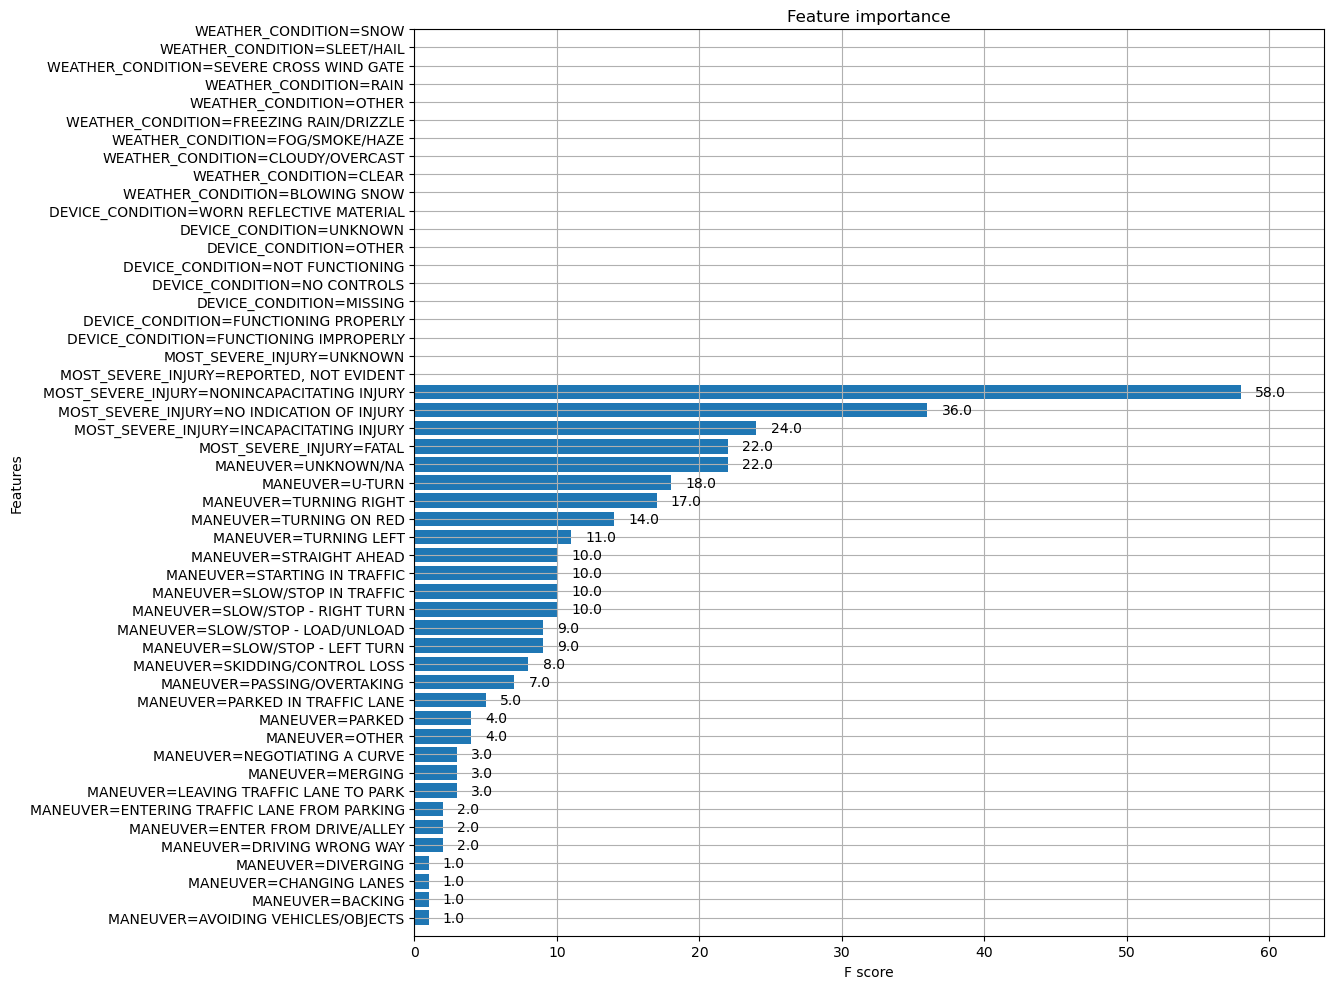

In [14]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.tight_layout()  # Adjust spacing

# Customize tick labels
ax.set_yticks(range(50))  # Set tick locations
ax.set_yticklabels(feature_names[:50])  # Set tick labels for top 10 features

plt.show()


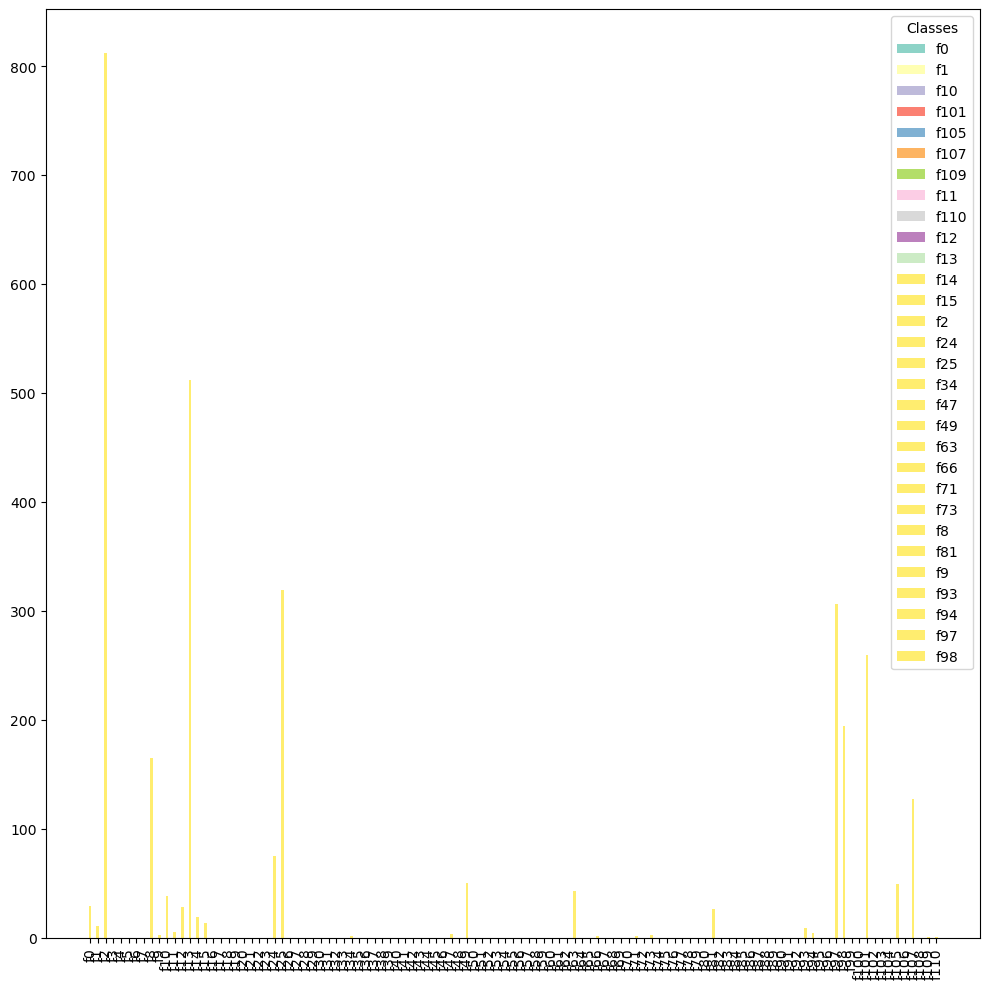

In [15]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the processed data
combined_sparse = sp.load_npz('data/combined_sparse.npz')
df_targets = pd.read_csv('data/df_targets.csv')
df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# Encode the target variable
label_encoder = LabelEncoder()
df_targets_encoded = pd.DataFrame()
df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_sparse,
    df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
    test_size=0.2,
    random_state=42
)

# Convert the sparse matrix to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)

# Get the feature importance scores for each class
class_importance = model.get_score(importance_type='total_gain')

# Prepare data for the stacked bar chart
class_labels = sorted(class_importance.keys())
feature_names = ['f' + str(i) for i in range(X_train.shape[1])]  # Assuming X_train has the original feature names

feature_importance = {class_label: [class_importance.get(feature, 0) for feature in feature_names] for class_label in class_labels}

# Plot feature importances for each class
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = range(len(feature_names))
colors = plt.cm.Set3(range(len(class_labels)))

for i, class_label in enumerate(class_labels):
    ax.bar(x, feature_importance[class_label], width, label=class_label, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend(title='Classes')
plt.tight_layout()
plt.show()



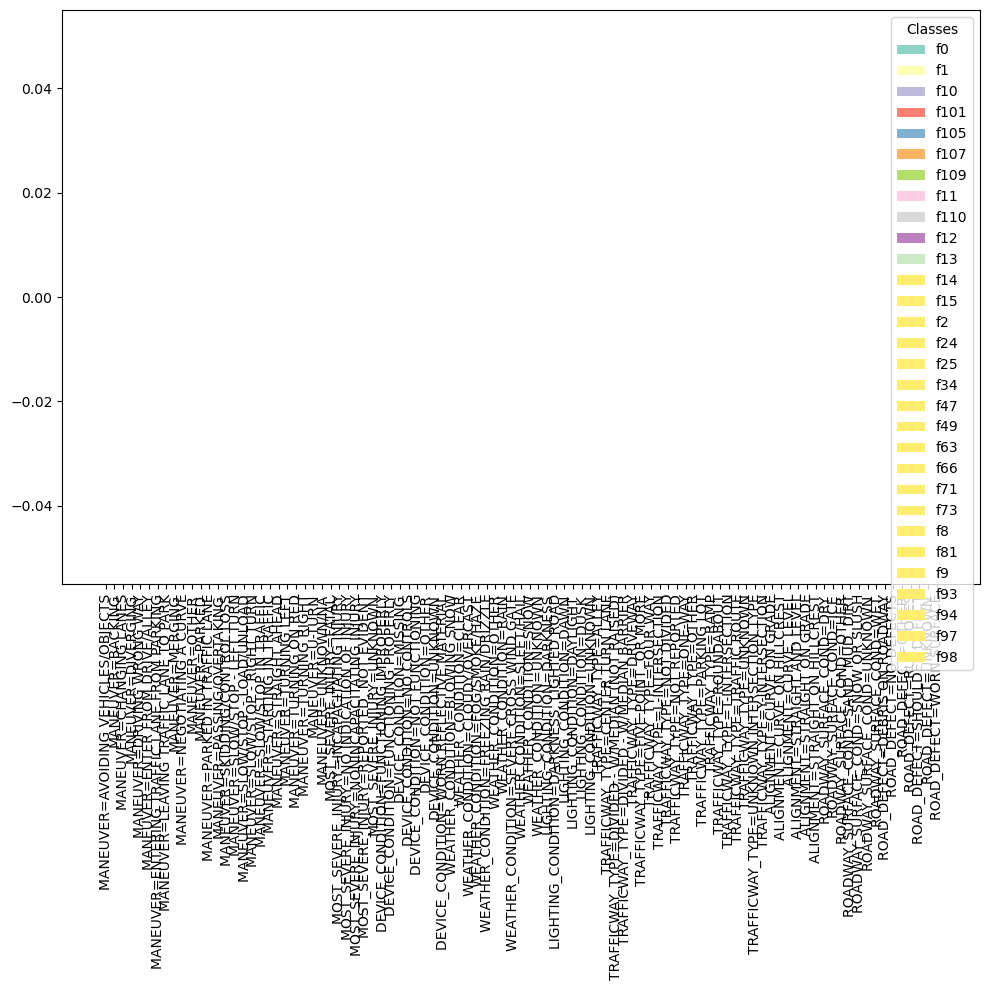

In [16]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get the feature importance scores for each class
class_importance = model.get_score(importance_type='total_gain')

# Prepare data for the stacked bar chart
class_labels = sorted(class_importance.keys())
feature_importance = {class_label: [class_importance.get(feature, 0) for feature in feature_names] for class_label in class_labels}

# Plot feature importances for each class
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = range(len(feature_names))
colors = plt.cm.Set3(range(len(class_labels)))

for i, class_label in enumerate(class_labels):
    ax.bar(x, feature_importance[class_label], width, label=class_label, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend(title='Classes')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get the feature importance scores for each class
class_importance = model.get_score(importance_type='total_gain')

# Prepare data for the stacked bar chart
class_labels = sorted(class_importance.keys())
feature_importance = {feature: [class_importance.get(f"{feature}_{class_label}", 0) for feature in feature_names] for class_label in class_labels}

# Plot feature importances for each class
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = range(len(feature_names))
colors = plt.cm.Set3(range(len(class_labels)))

for i, class_label in enumerate(class_labels):
    ax.bar(x, feature_importance[class_label], width, label=class_label, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend(title='Classes')
plt.tight_layout()
plt.show()


NameError: name 'feature' is not defined

KeyError: 'f0'

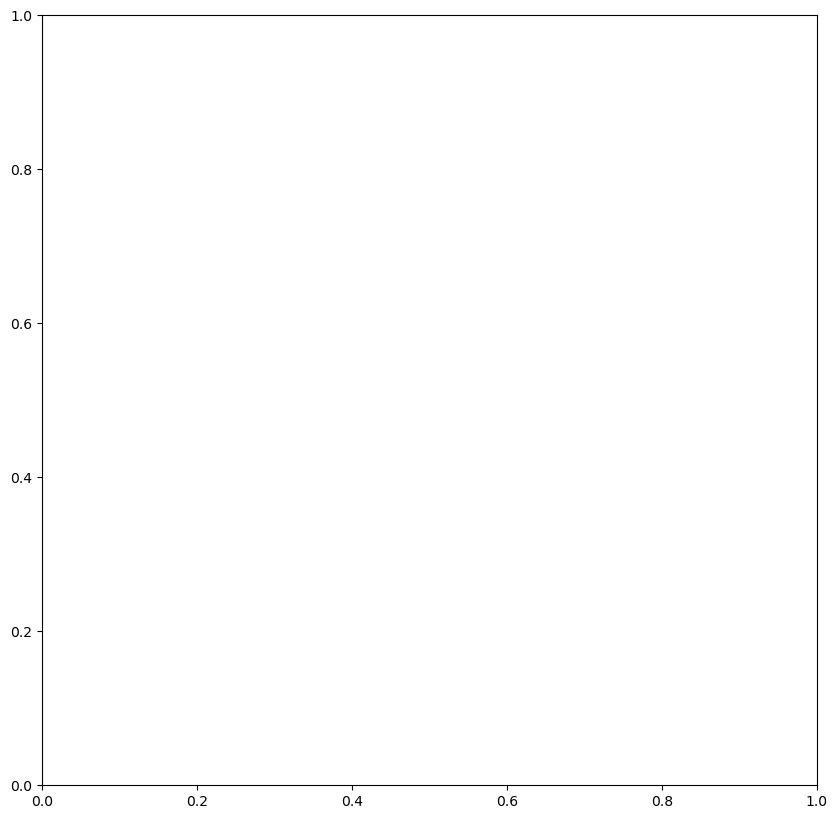

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get the feature importance scores for each class
class_importance = model.get_score(importance_type='total_gain')

# Prepare data for the stacked bar chart
class_labels = sorted(class_importance.keys())
feature_importance = {feature: [class_importance.get(f"{feature}_{class_label}", 0) for class_label in class_labels] for feature in feature_names}

# Plot feature importances for each class
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = range(len(feature_names))
colors = plt.cm.Set3(range(len(class_labels)))

for i, class_label in enumerate(class_labels):
    ax.bar(x, feature_importance[class_label], width, label=class_label, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend(title='Classes')
plt.tight_layout()
plt.show()


KeyError: 'f0'

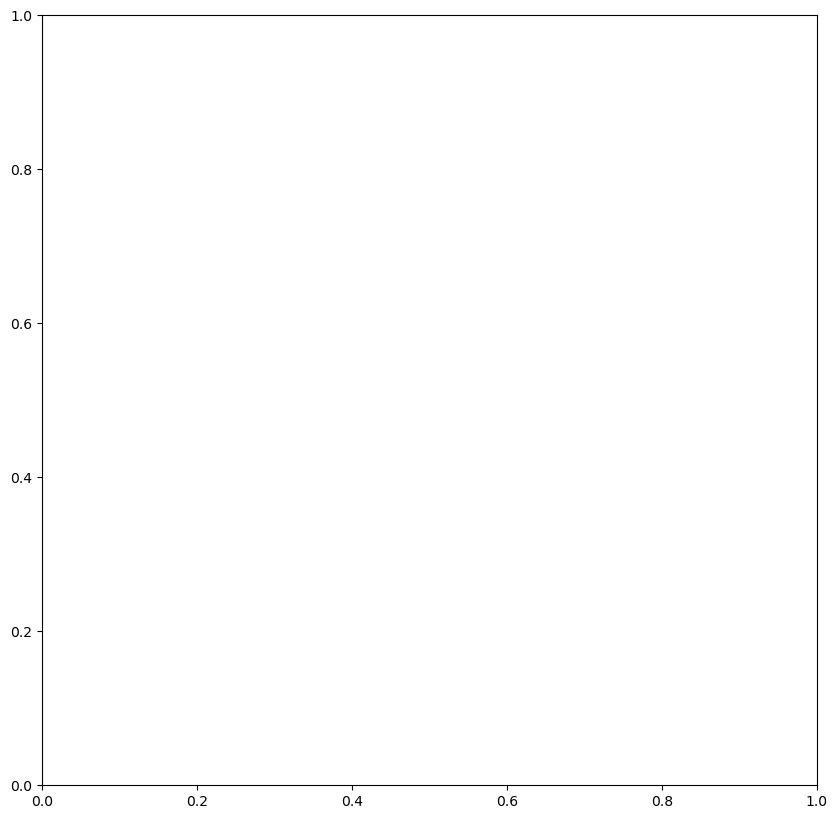

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

# Get the feature importance scores for each class
class_importance = model.get_score(importance_type='total_gain')

# Prepare data for the stacked bar chart
class_labels = sorted(class_importance.keys())
feature_importance = {feature: [class_importance.get(feature, 0) for _ in class_labels] for feature in feature_names}

# Plot feature importances for each class
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.35
x = range(len(feature_names))
colors = plt.cm.Set3(range(len(class_labels)))

for i, class_label in enumerate(class_labels):
    ax.bar(x, feature_importance[class_label], width, label=class_label, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=90)
ax.legend(title='Classes')
plt.tight_layout()
plt.show()


In [ ]:
# import pandas as pd
# import xgboost as xgb
# import matplotlib.pyplot as plt
# import numpy as np

# # Load the feature names from the CSV file
# feature_names_df = pd.read_csv('data/feature_names.csv')
# feature_names = feature_names_df['Feature Name'].tolist()

# # Convert the feature names to a dictionary for labeling
# feature_labels = {i: feature_names[i] for i in range(len(feature_names))}

# # Plot feature importance
# fig, ax = plt.subplots(figsize=(10, 10))
# xgb.plot_importance(model, max_num_features=len(feature_names), height=0.8, ax=ax)
# ax.set_yticks(range(len(feature_names)))  # Set tick locations
# ax.set_yticklabels([feature_labels[i] for i in range(len(feature_names))])  # Set tick labels
# plt.tight_layout()  # Adjust spacing
# plt.show()


In [ ]:
len(feature_names_df)

17752

In [ ]:
X_train.shape

(6762, 17766)

IndexError: list index out of range

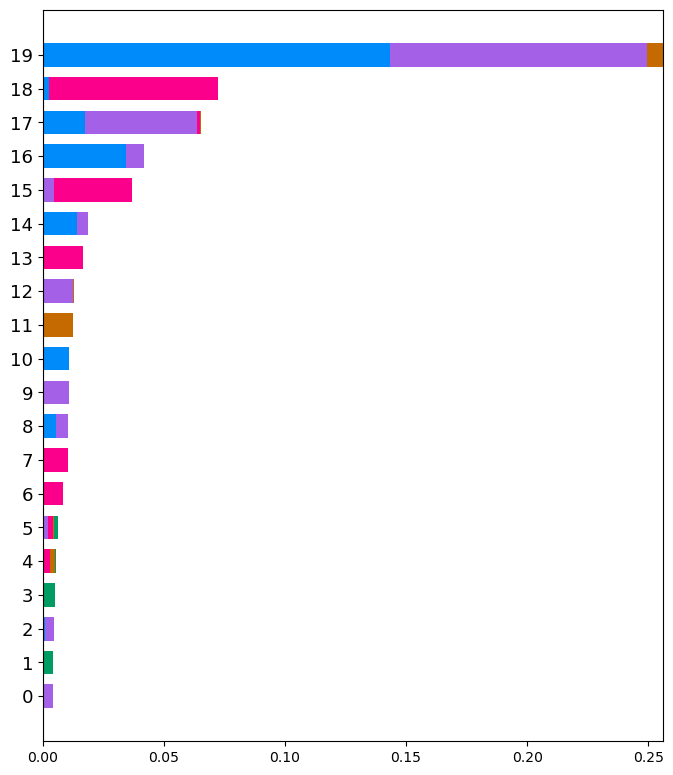

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Get feature names
feature_names = list(feature_names_df)  # Replace with your feature names

# Plot feature importance with labels
shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type='bar')

# Visualize individual predictions
sample_index = 0  # Index of the sample to explain
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_train[sample_index], feature_names=feature_names)

# Show the plot
plt.show()


c:\Anaconda3\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Anaconda3\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_passes=2):
c:\Anac

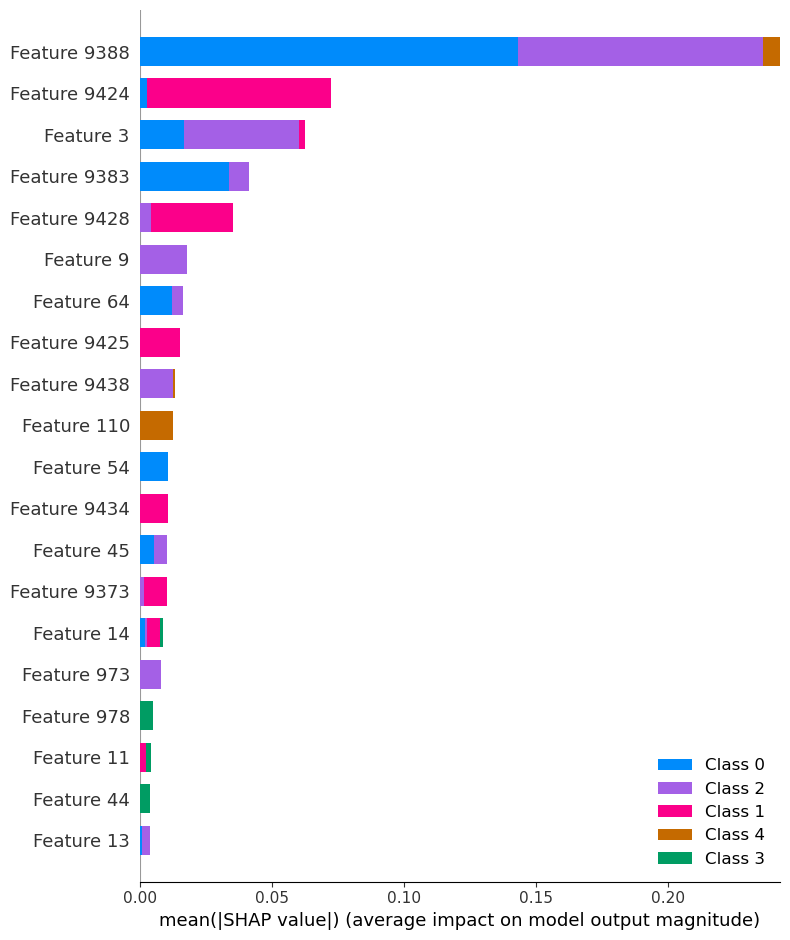

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot feature importance
shap.summary_plot(shap_values, X_train, plot_type='bar')

# Visualize individual predictions
sample_index = 0  # Index of the sample to explain
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_train[sample_index])

# Show the plot
plt.show()


# for the love of god don't run this

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid for grid search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 500, 1000],
# }

# # Create the XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameter combination and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# accuracy = best_model.score(X_test, y_test)
# print("Best Parameters:", best_params)
# print("Best Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}

Best Accuracy: 0.834780551283568

# old models

In [ ]:
# # Load the processed data
# combined_sparse = sp.load_npz('data/combined_sparse.npz')
# df_targets = pd.read_csv('data/df_targets.csv')
# df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# # Encode the target variable
# label_encoder = LabelEncoder()
# df_targets_encoded = pd.DataFrame()
# df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     combined_sparse,
#     df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
#     test_size=0.2,
#     random_state=42
# )

# # Convert the sparse matrix to DMatrix format
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Set the XGBoost parameters
# params = {
#     'learning_rate': 0.1,
#     'max_depth': 7,
#     'n_estimators': 1000,
#     'eta': 0.1,
#     'objective': 'multi:softmax',
#     'num_class': len(label_encoder.classes_)
# }

# # Train the XGBoost model
# model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

# # Evaluate the model
# predictions = model.predict(dtest)
# accuracy = (predictions == y_test).mean()
# print("Accuracy:", accuracy)
